## Script to plot domain and elevation from geo_em.d01.nc file
This is an example for Medicane Zorbas experiment
This script uses cartopy package for plotting maps

Loading modules required

In [4]:
import xarray as xr
import numpy as np
import netCDF4 as nc
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import wrf
import string

Importing geo_em.d01.nc file and variables
Setting map limits and projection based on the input wrf file

In [5]:
#getting geographical info for plotting
geo_filename = './geo_em.d01.Zorbas.nc'
geo_file = xr.open_dataset(geo_filename)
geo_file_lm = geo_file.HGT_M.squeeze()
xbounds = wrf.cartopy_xlim(wrfin=nc.Dataset(geo_filename))
ybounds = wrf.cartopy_ylim(wrfin=nc.Dataset(geo_filename))
geo_proj = wrf.get_cartopy(wrfin=nc.Dataset(geo_filename))

lats = geo_file.XLAT_M.squeeze().values
lons = geo_file.XLONG_M.squeeze().values

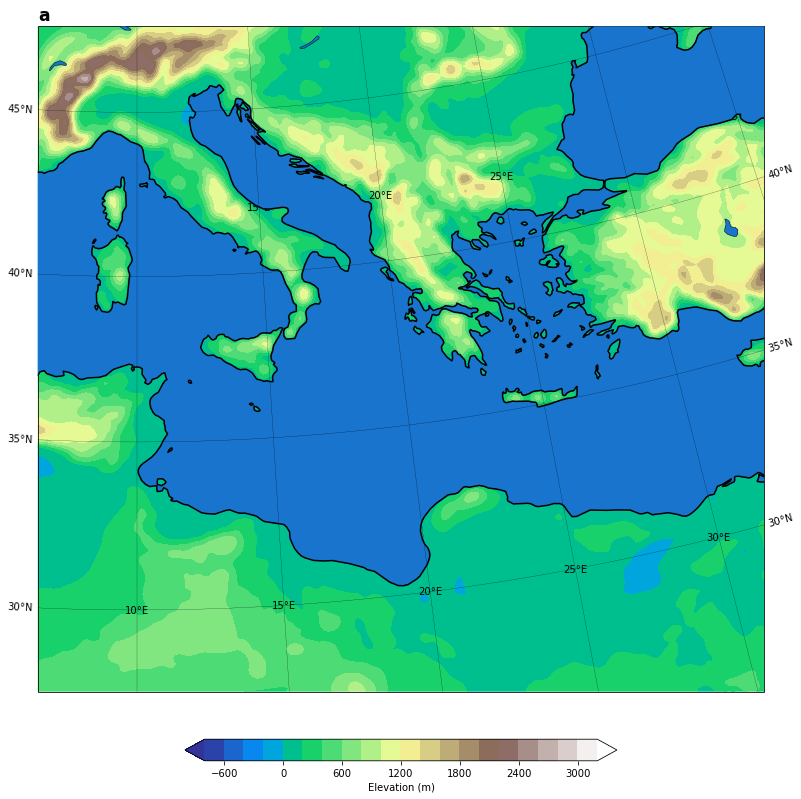

In [6]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1,projection=geo_proj)
ax.set_title(f'{string.ascii_lowercase[0]}',loc='left',fontsize='xx-large',fontweight='bold')
ax.coastlines(linewidth=1.5,zorder=102,resolution='50m')
ct=ax.contourf(lons,lats,geo_file_lm,levels=np.arange(-800,3400,200),cmap='terrain',extend='both',transform=crs.PlateCarree())
gl=ax.gridlines(crs=crs.PlateCarree(), xlocs=range(-180,181,5), ylocs=range(-80,81,5),
                 draw_labels=True, zorder=102,
                 linewidth=0.2, color='k', alpha=1, linestyle='-')

ax.add_feature(cfeature.OCEAN, zorder=100,facecolor=[24/255,  116/255,  205/255])
ax.add_feature(cfeature.LAKES, zorder=100,linewidth=0.5,edgecolor='k',facecolor=[24/255,  116/255,  205/255])


# gl.xlabels_top = False
# gl.ylabels_right = False

# Set the map bounds
ax.set_xlim(xbounds)
ax.set_ylim(ybounds)

# Adding colorbar

cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.025])
cbar=plt.colorbar(ct, cax=cbar_ax,orientation="horizontal")
cbar.set_label ('Elevation (m)')
fig.subplots_adjust(left=0.05,right=0.95,top=0.95,bottom=0.18,wspace=0.1,hspace=0.5)

